# Import libraries

In [137]:
pip install xgboost

In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Data collection and preprocessing

In [217]:
data_set = pd.read_csv('Train.csv')

In [218]:
data_set.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [219]:
data_set.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Here we can see that there are missing values in 'Item_Weight' and 'Outlet_Size'.

# Filling missing values 

Analyse the distribution of data in the 'Item_Weight'.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

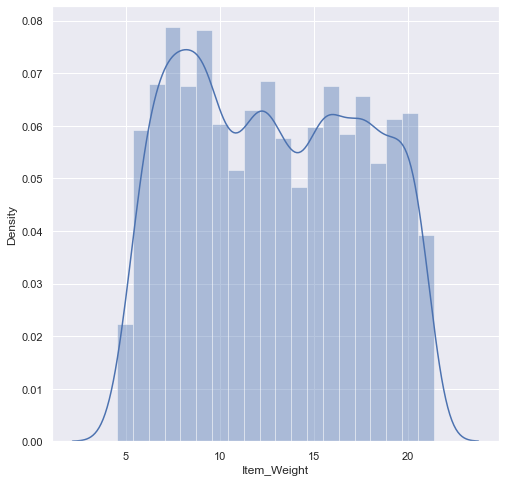

In [220]:
sns.set()
fig, ax = plt.subplots(figsize = (8,8))
sns.distplot(data_set.Item_Weight)

In [221]:
data_set['Item_Weight'].mean()

12.857645184136183

In [222]:
data_set['Item_Weight'].fillna(data_set['Item_Weight'].mean(), inplace = True)

In [223]:
# mode of "Outlet_Size" column
data_set['Outlet_Size'].mode()

0    Medium
dtype: object

In [224]:
# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = data_set.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [225]:
mode_of_Outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [226]:
missing_values = data_set['Outlet_Size'].isnull()   

In [227]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [228]:
data_set.loc[missing_values, 'Outlet_Size'] = data_set.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [229]:
data_set.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Data Analysis

Categorical Features:

    Item_Identifier
    Item_Fat_Content
    Item_Type
    Outlet_Identifier
    Outlet_Size
    Outlet_Location_Type
    Outlet_Type

In [230]:
data_set.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


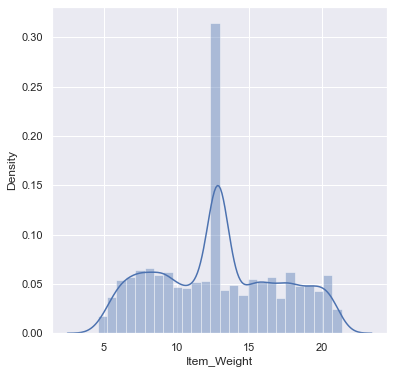

In [231]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(data_set['Item_Weight'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


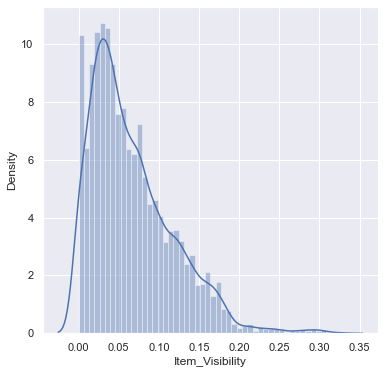

In [232]:
# Item_Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(data_set['Item_Visibility'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


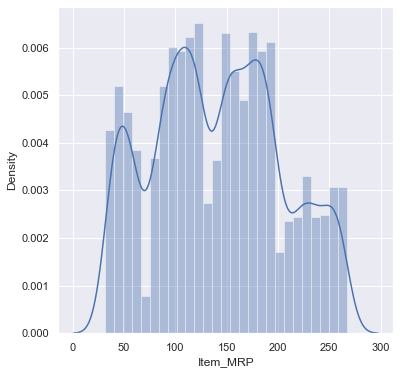

In [233]:
# Item_MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(data_set['Item_MRP'])
plt.show()

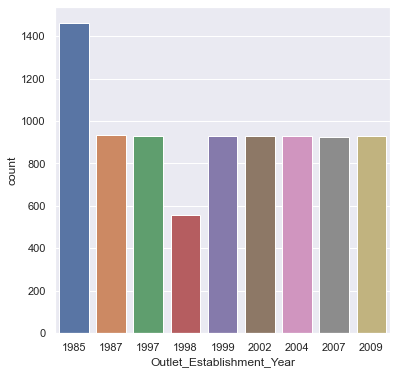

In [234]:
# Outlet_Establishment_Year
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=data_set)
plt.show()

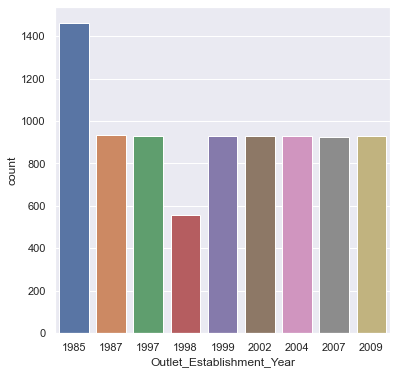

In [235]:
# Item_Outlet_Sales
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=data_set)
plt.show()

In [236]:
data_set.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [237]:
data_set['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [238]:
data_set.replace({'Item_Fat_Content' : {'Low Fat' : 'LF', 'Regular' : 'reg', 'low fat' : 'LF'}}, inplace = True)

In [239]:
data_set['Item_Fat_Content'].value_counts()

LF     5517
reg    3006
Name: Item_Fat_Content, dtype: int64

# Label Encoding

In [240]:
encoder = LabelEncoder()

In [241]:
data_set['Item_Identifier'] = encoder.fit_transform(data_set['Item_Identifier'])

data_set['Item_Fat_Content'] = encoder.fit_transform(data_set['Item_Fat_Content'])

data_set['Item_Type'] = encoder.fit_transform(data_set['Item_Type'])

data_set['Outlet_Identifier'] = encoder.fit_transform(data_set['Outlet_Identifier'])

data_set['Outlet_Size'] = encoder.fit_transform(data_set['Outlet_Size'])

data_set['Outlet_Location_Type'] = encoder.fit_transform(data_set['Outlet_Location_Type'])

data_set['Outlet_Type'] = encoder.fit_transform(data_set['Outlet_Type'])

In [242]:
data_set.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# Spliting features and Target

In [243]:
x = data_set.drop(columns = 'Item_Outlet_Sales', axis = 1)

In [244]:
y = data_set['Item_Outlet_Sales']

In [245]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.20, random_state = 3)

In [246]:
x.shape, X_train.shape, X_test.shape

((8523, 11), (6818, 11), (1705, 11))

# Model Traning 



In [247]:
model = XGBRegressor()

In [248]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

Evaluation

In [249]:
x_train_prediction = model.predict(X_train)

In [250]:
# R squared Value
r2_train = metrics.r2_score(Y_train, x_train_prediction)

In [251]:
print('R Squared value = ', r2_train)

R Squared value =  0.8496380666472023


In [252]:
# prediction on test data
x_test_prediction = model.predict(X_test)

In [253]:
# R squared Value
r2_test = metrics.r2_score(Y_test, x_test_prediction)

In [254]:
print('R Squared value = ', r2_test)

R Squared value =  0.5609337806910826
